In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math

In [2]:
data_folder = './Data/' # all my data is in one folder 
path_sources_final='sources_final.csv'
path_control_grp='sources_1.csv'
path_df1='df_1.csv'
path_df2='df_2.csv'

In [3]:
#getting our necessary datasets
df_sources_final=pd.read_csv(data_folder + path_sources_final) #maps channel_id to extreme grp corresponding
df_1=pd.read_csv(data_folder + path_df1)
df_2=pd.read_csv(data_folder + path_df2)

In [4]:
#combining the two dataframes from the two folders 
#(should do it right from the begining? I was afraid it would slow things to have a dataframe so big)
df=pd.concat([df_1, df_2],ignore_index=True)

In [5]:
#extracting only necessary columns
df_sources=df_sources_final[["Category", "Id"]]
df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)

C:\Users\HOURS\AppData\Local\Temp\ipykernel_9792\2487438044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)


In [6]:
#checking if there are channels from media in df_sources_final
df_sources.head()

,Category,channel_id
0,Alt-lite,UCfDdlNLRVb1h3_7Xh-WhL3w
1,Alt-lite,UCso6oQ3qy7z61Fr8b0WNBMw
2,Alt-lite,UCplXdu0g94UynzYCmO2zOjw
3,Alt-lite,UCl3RCEtooHD5bhPCHJw3btA
4,Alt-lite,UCbukZErY9SjdGTHabMzY7qg


In [7]:
'vox' in df_sources_final.Name.values

True

In [8]:
df_sources_final[df_sources_final["Name"]=='vox']

,Name,Category,Data Collection step,Id
624,vox,left,0,UCLXo7UDZvByw2ixzpQCufnA


In [9]:
df_sources.head()

,Category,channel_id
0,Alt-lite,UCfDdlNLRVb1h3_7Xh-WhL3w
1,Alt-lite,UCso6oQ3qy7z61Fr8b0WNBMw
2,Alt-lite,UCplXdu0g94UynzYCmO2zOjw
3,Alt-lite,UCl3RCEtooHD5bhPCHJw3btA
4,Alt-lite,UCbukZErY9SjdGTHabMzY7qg


In [10]:
#checking for NaN values
print("there are", len(df_sources[df_sources.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [11]:
df.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g


In [12]:
#checking for NaN values
print("there are", len(df[df.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [13]:
#checking if nb of channels in df_1 is the same as in df_sources
print(len(pd.unique(df['channel_id'])), len(pd.unique(df_sources['channel_id'])))

697 676


In [14]:
#we have more channels in df than in df_sources but the difference is small

In [15]:
df_final=df.merge(df_sources, how='left', on='channel_id')

In [16]:
df_final

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id,Category
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518458,150459,798,56069.0,20170127,0.327090,0.013587,0.205679,0.050272,0.182447,0.001762,0.053731,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite
518459,150460,799,154838.0,20161018,0.209794,0.007211,0.134747,0.027038,0.094364,0.010686,0.024407,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite
518460,150461,800,30093.0,20180326,0.237014,0.004566,0.083292,0.062911,0.147315,0.001810,0.019613,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite
518461,150462,801,93406.0,20171219,0.309945,0.009368,0.155549,0.086939,0.165149,0.011248,0.023771,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite


In [19]:
#overwriting the category for the channels belonging to the control group
df_control_=pd.read_csv(data_folder + path_control_grp) #maps channel_id to extreme grp corresponding

In [20]:
#list of channels belonging to control grp
list_control_=(df_control_[df_control_["Data Collection step"]=='control'].Id).tolist()

In [25]:
df_final.loc[df_final["channel_id"].isin(list_control_), "Category"] = 'control'

In [26]:
#checking for NaN values
nb_Nan=len(df_final[df_final.isnull().any(axis=1)])
print("there are", nb_Nan, "Nan values which corresponds to", nb_Nan*100/len(df_final), "% of the dataframe")

there are 1998 Nan values which corresponds to 0.3853698335271755 % of the dataframe


In [29]:
#very little Nan values, we won't be using channels where the category is Nan (unknown)

In [30]:
#Notice None means "not associated to anything" and not "Nan" 
df_final.Category.value_counts()

control                  332815
Alt-lite                  63667
Intellectual Dark Web     34252
PUA                       27508
MGTOW                     19932
NONE                      14793
Alt-right                 14208
MRA                        5613
Incel                      3468
PUA                         209
Name: Category, dtype: int64

In [31]:
#MGTOW men going their own way, anti feminist misogynistic politic group

#MRA men's rights activist (again anti feminist)

#Incel a member of an online community of young men who consider themselves unable to attract women sexually, 
#typically associated with views that are hostile towards women and men who are sexually active:

#Pick up : online community sharing tips on how to pick up women

### Let's start our analysis

Now that we have our dataframe and all the values we want we can start our analysis. 
We're keeping only Alt-lite, Alt-right, Intellectual Dark Web channels and control channels. 

In [ ]:
#several questions, should I divide into many sub-dataFrames? Not? Should definitely plot boxplot to compare them. 
#Check distribution also with histogram? 

In [ ]:
#for simplicity/clearness of the code we create 4 dataframes corresponding to Alt-lite, Alt-right, 
#Intellectual Dark Web channels and control channels.
df_alt_lite=df_final[df_final['Category']=='Alt-lite']
df_alt_lite=df_alt_lite.drop(columns=['video_map', 'view_count', 'upload_date', 'channel_id', 'Category', 'Unnamed: 0'])
df_alt_right=df_final[df_final['Category']=='Alt-right']
df_idw=df_final[df_final['Category']=='Intellectual Dark Web']
df_control=df_final[df_final['Category']=='control']

In [40]:
#getting some basic information 
df_extreme=df_final.loc[df_final['Category'].isin(['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control'])]

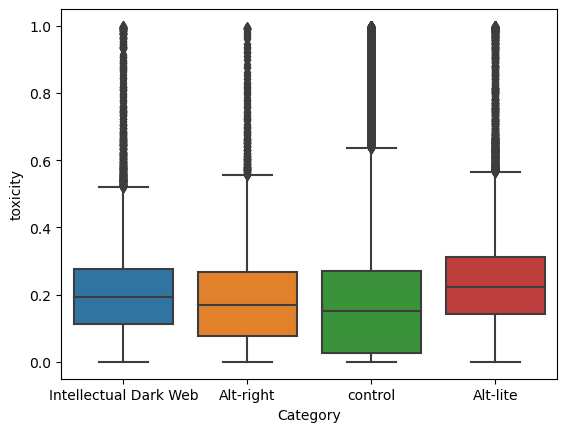

In [39]:
ax = sns.boxplot(x="Category", y="toxicity", data=df_final.loc[df_final['Category'].isin(['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control'])])

Text(0, 0.6, 'Nb channels')

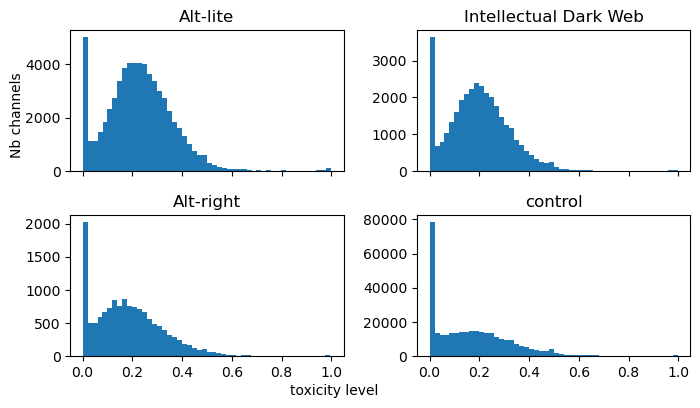

In [62]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = True) #chose sharey=False as we are interested 
#the distribution, not the exact values
list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_category[i]]
    sbplt.hist(df['toxicity'].values, bins = 50)
    sbplt.set_title(list_category[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "Nb channels", rotation = 90)

**Discussion:** We see they all have a peak at 0 (the first bin), all are left skewed they all seem to have their peak (other than the one at 0) 